In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/google-stock-price-data-2020-2025-googl/googl_data_2020_2025.csv


# Data Exploration

In [2]:
#data loading
data = pd.read_csv('/kaggle/input/google-stock-price-data-2020-2025-googl/googl_data_2020_2025.csv')

In [3]:
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000


In [4]:
data.tail()

,Price,Adj Close,Close,High,Low,Open,Volume
1255,2024-12-24 00:00:00+00:00,196.1100006,196.1100006,196.1100006,193.7799988,194.8399963,10403300
1256,2024-12-26 00:00:00+00:00,195.6000061,195.6000061,196.75,194.3800049,195.1499939,12046600
1257,2024-12-27 00:00:00+00:00,192.7599945,192.7599945,195.3200073,190.6499939,194.9499969,18891400
1258,2024-12-30 00:00:00+00:00,191.2400055,191.2400055,192.5500031,189.1199951,189.8000031,14264700
1259,2024-12-31 00:00:00+00:00,189.3000031,189.3000031,191.9600067,188.5099945,191.0800018,17466900


In [5]:
data.shape

(1260, 7)

In [6]:
data.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,Ticker,105.5872421,105.9700012,142.0800018,70.13400269,138.5,22288000
freq,1,3,3,3,2,3,3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [8]:
# check null values
data.isnull().sum()

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64

# Data Preprocessing

In [9]:
#remove first two rows
data = data.iloc[2:].reset_index(drop=True)
data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [10]:
# change the column name
data.rename(columns={"Price": "Date"}, inplace=True)
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [11]:
# Convert the 'Date' column to YYYY-MM-DD format
data["Date"] = pd.to_datetime(data["Date"]).dt.strftime('%Y-%m-%d')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
1,2020-01-03,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
2,2020-01-06,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
3,2020-01-07,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
4,2020-01-08,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000


In [12]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Identify numeric columns
numeric_cols = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]

# Convert columns to float
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors="coerce")

print(data.dtypes)

Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [13]:
# Compute daily price change (%)
data["Price Change (%)"] = data["Close"].pct_change() * 100
data.dropna(inplace=True)  

## Now Do Analysis

## Correlation between Volume and Price Chang

In [14]:
correlation = data["Volume"].corr(data["Price Change (%)"])
print(f"Correlation between Volume and Price Change: {correlation:.4f}")

Correlation between Volume and Price Change: -0.0234


## Closing Price Over Time

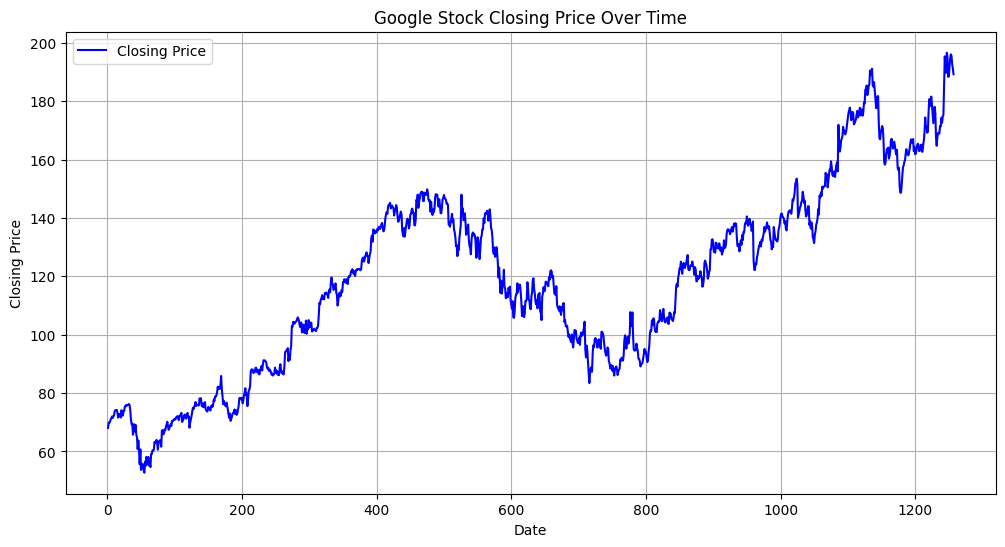

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Google Stock Closing Price Over Time")
plt.legend()
plt.grid()
plt.show()


## Price Change (%) Distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


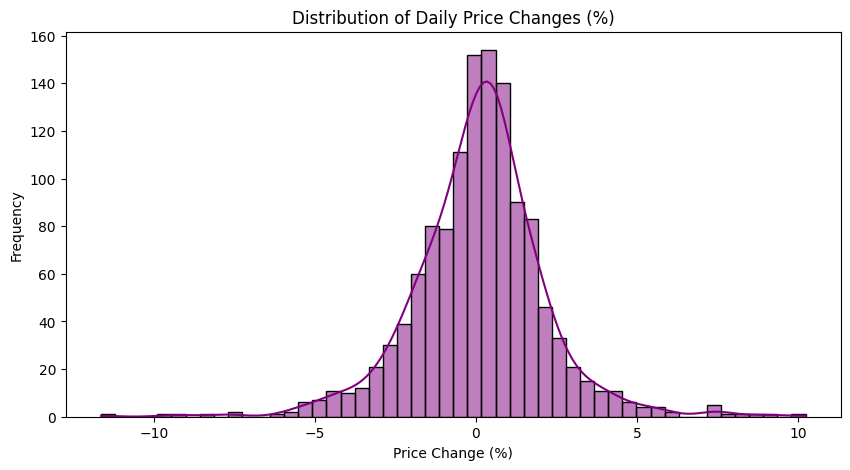

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data["Price Change (%)"], bins=50, kde=True, color="purple")
plt.xlabel("Price Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Price Changes (%)")
plt.show()


## Volume vs Closing Price Scatter Plot

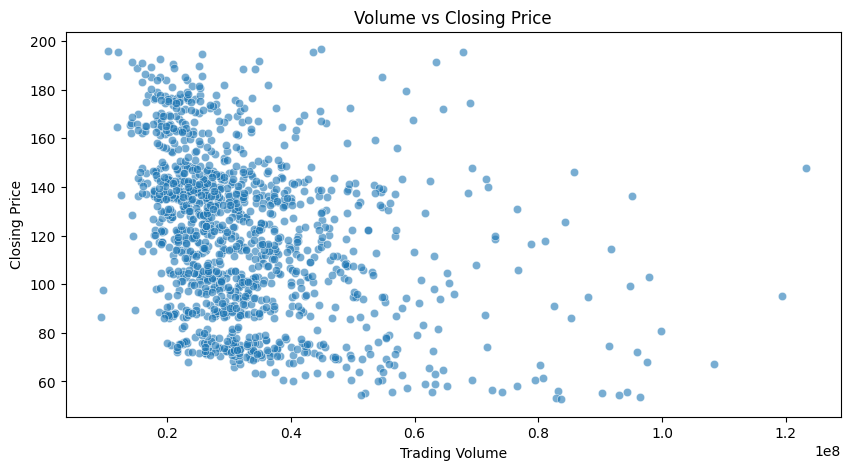

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data["Volume"], y=data["Close"], alpha=0.6)
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price")
plt.title("Volume vs Closing Price")
plt.show()


## Moving Average (Trend Smoothing)

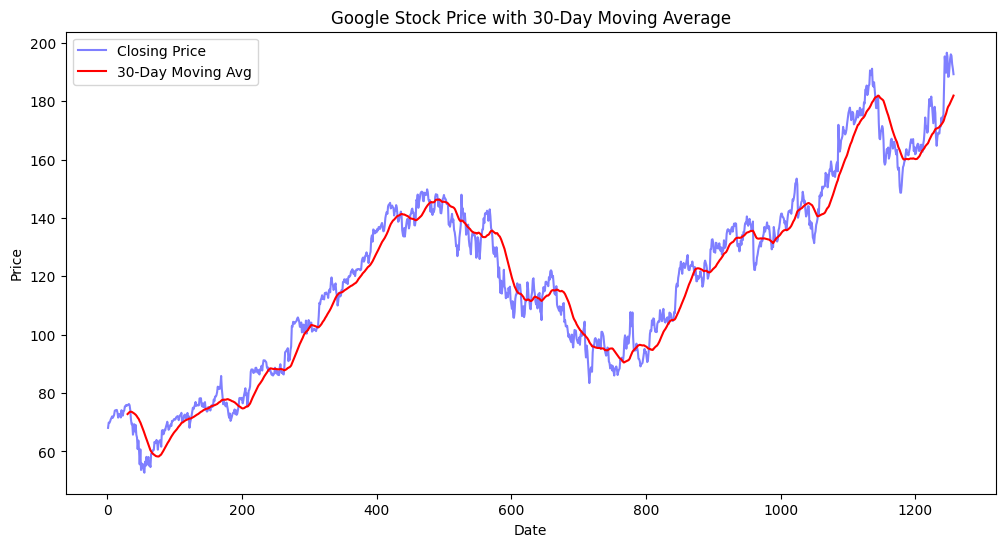

In [18]:
data["Moving Average (30 days)"] = data["Close"].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue", alpha=0.5)
plt.plot(data.index, data["Moving Average (30 days)"], label="30-Day Moving Avg", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Google Stock Price with 30-Day Moving Average")
plt.legend()
plt.show()
